# Future Rewards II: Temporal Difference Learning

In previous lectures, we discussed a form of the Bellman equation, which links the action value of the state-action pair with that of the next:

$$q^\pi(s, a) = \mathbb{E}_\pi[R_{t+1} + \gamma q^\pi(s', a') \;|\; S_t = s, A_t = a]$$

This form of the equation is crucial for reinforcement learning because it establishes that the action values of a state can be learned by knowing the immediate reward and the reward of the next-state action. The condition is necessary because the reward and the next state action depend on the current state. The expectation is required because, in general, the reward is stochastic as well as the next state. We will use a simplified notation from now on, describing the equation as:

$$q^\pi(s, a) = \mathbb{E}_\pi[R_{t+1} + \gamma q^\pi(s', a') \;|\; s,a]$$

Another way to think of this equation is that the expected reward of the current state action should match the immediate reward plus the expected reward of the next current state, discounted by $\gamma$. This discount factor stems from the definition of the discounted total expected return that we seek to maximise.

The action value is parameterised by policy $\pi$, because how we select our actions affects the reward we collect. For instance, if we assume a random policy, as assumed in earlier exercises for simplicity, we cannot possibly expect to get the maximum reward. Because $q^\pi(s, a)$ is the expected reward and under this framework, we assume we know the true action-values, a greedy policy will be an optimal policy. In fact, an optimal policy is a policy that is better or equal in terms of performance compared to any other policy. We can denote this as:

$$q^*(s,a) = \max_\pi q^\pi(s,a)$$

And by setting $\pi=*$,

$$q^*(s, a) = \mathbb{E}[r + \gamma \max_{a'} q^*(s', a') \;|\; s, a]$$

Now we will follow the same methodology that we did under bandits. We will define an error function which will allow us to estimate $Q(s,a)$, a parameter that approximates $q(s,a)$.

We will first start from: 

$$q^\pi(s, a) = \mathbb{E}_\pi[R_{t+1} + \gamma q^\pi(s', a') \;|\; s,a]$$

Based on the properties of Expectation, it is easy to see that we can write:

$$\mathbb{E}_\pi[r + \gamma q^\pi(s', a') - q^\pi(s, a) \;|\; s, a] = 0$$

Since we want to minimise (ideally make 0) the terms within the expectation, we define:

$$E = \frac{1}{2}(r + \gamma Q(s', a') - Q(s, a))^2$$

And by taking the gradient:

$$\frac{\partial E}{\partial Q(s,a)} = - (r + \gamma Q(s', a') - Q(s, a))$$

We derive:

$$\Delta Q = - \eta \frac{\partial E}{\partial Q(s,a)} = \eta (r + \gamma Q(s', a') - Q(s, a))$$

We note that $Q(s', a')$ can be considered as a constant when we take the partial derivative because the expected reward from state $s'$ does not depend on earlier states, as Markovianity suggests.

We then achieve our first temporal difference learning rule, SARSA:

$$\Delta Q = \eta (r + \gamma Q^\pi(s', a') - Q^\pi(s, a)).$$

Building on this foundational concept of temporal difference learning, we will discuss a concrete implementation of these principles through the Sarsa algorithm. SARSA stands for STATE-ACTION-REWARD-STATE-ACTION, for a good reason, depicitng the information required by the algorithm in order to calculate its update.

## The SARSA Algorithm

We now proceed to delve into a specific algorithmic implementation known as Sarsa. Let's outline the steps of the algorithm.

1. Initialise $Q(s, a)$ arbitrarily for all $s \in S$ and $a \in A(s)$.
2. Repeat (for each episode):
   - **a.** Initialise $s$.
   - **b.** Choose an action $a$ from $s$ using a policy derived from $Q$ (e.g., $\epsilon$-greedy).
   - **c.** Repeat (for each step of the episode):
        - **i.** Take action $a$, observe reward $r$ and next state $s'$.
        - **ii.** Choose $a'$ from $s'$ using a policy derived from $Q$ (e.g., $\epsilon$-greedy).
        - **iii.** Update $Q(s, a)$ using the equation: $Q(s, a) \leftarrow Q(s, a) + \eta \cdot [r + \gamma \cdot Q(s', a') - Q(s, a)]$.
        - **iv.** Update state and action: $s \leftarrow s'; a \leftarrow a'$.
   - **d.** Continue until $s$ is terminal.

This step-by-step procedure highlights the iterative and experience-based nature of learning in reinforcement learning environments, bridging the gap between theoretical concepts and their practical application.


Similarly, starting from:

$$q^*(s, a) = \mathbb{E}[r + \gamma \max_{a'} q^*(s', a') \; | \; s, a]$$

We can, again, write:

$$\mathbb{E}[r + \gamma \max_{a'} q^*(s', a') - q^*(s, a) \; | \; s, a] = 0$$

and define an error function:

$$E=\frac{1}{2}\left(r + \gamma \max_{a'} Q(s', a') - Q(s, a)\right)^2$$

Whose derivation will lead to the update rule for Q-learning:

$$\Delta Q=\eta \left(r + \gamma \max_{a'} Q(s', a') - Q(s, a)\right).$$



## The Q-learning Algorithm

Following the Q-learning update rule, the algorithm can be summarised as follows:

1. Initialise $Q(s, a)$ arbitrarily for all $s \in S$ and $a \in A(s)$.
2. Repeat (for each episode):
    - **a.** Initialise $s$.
    - **b.** Repeat (for each step of the episode):
        - **i.** Choose an action $a$ from $s$ using a policy derived from $Q$ (e.g., $\epsilon$-greedy).
        - **ii.** Take action $a$, observe reward $r$ and next state $s'$.
        - **iii.** Update $Q(s, a)$ using the equation: $Q(s, a) \leftarrow Q(s, a) + \eta \cdot [r + \gamma \cdot \max_{a'} Q(s', a') - Q(s, a)]$.
        - **iv.** Update state: $s \leftarrow s'$.
    - **c.** Continue until $s$ is terminal.



## Need for Statistics

TD algorithms, including SARSA and Q-Learning, are **stochastic**. Their performance depends on initialisation, the chosen policy, and the probabilistic nature of environment transitions and rewards. We define an "episode" as the period during which we place the agent in the environment until it completes the task. A single episode will likely not be sufficient for the agent to learn the task; thus, typically, the agent is exposed to many consecutive episodes. Across these episodes, the information stored in the Q-values is retained. The number of episodes required is determined by the task's difficulty and is often at the discretion of the model creator. This process is termed "one run". To obtain reliable learning curves, it is necessary to average the results over a number of runs, which is again a choice made by the modeller.

It's also crucial to consider the variance in the outcomes across different runs. Due to the stochastic nature of both the algorithms and the environments they interact with, significant variability in learning outcomes can be observed. Statistical analysis, such as computing confidence intervals or variance, can provide deeper insights into the reliability and robustness of the learned policy. 

## Differences between SARSA and Q-Learning

SARSA, as an on-policy reinforcement learning algorithm, directly learns the value of the policy being executed, including the exploration steps. It updates its Q-values based on the actual actions taken by the agent, adhering to the equation:
$$Q(s, a) \leftarrow Q(s, a) + \eta [r + \gamma Q(s', a') - Q(s, a)],$$
where $\alpha$ is the learning rate, $r$ is the reward, $\gamma$ is the discount factor, $s$ is the current state, $a$ is the current action, $s'$ is the new state, and $a'$ is the new action according to the policy. This approach aligns SARSA's learning process closely with the agent's current strategy, leading to a more conservative policy development, especially in environments where certain actions might entail significant penalties.

Contrastingly, Q-Learning operates under an off-policy regime, aiming to learn the value function of the optimal policy independently of the agent's actions. It optimistically assumes the selection of the best possible future action, maximizing potential rewards:
$$Q(s, a) \leftarrow Q(s, a) + \eta [r + \gamma \max_{a'} Q(s', a') - Q(s, a)].$$
This difference in approach positions Q-Learning as a method capable of adopting a more aggressive exploration strategy, pursuing optimal future rewards without the direct influence of the agent's exploration strategy or the associated risks.

Theoretically, both SARSA and Q-Learning can converge to the optimal policy, especially as the exploration rate ($\epsilon$) decays appropriately over time, ensuring sufficient exploration and exploitation balance. However, practical challenges in reinforcement learning environments, such as the complexity of the state space, the variability of environmental dynamics, and the adequacy of the exploration decay rate, may hinder this convergence. Theoretical convergence assumes ideal conditions that often differ from real-world scenarios, where factors such as exploration strategy, reward distribution, and action penalties can significantly impact the learning process and the efficacy of the convergence to an optimal policy.


# Exercise 

Assume a greedy policy, how do SARSA and Q-learning differ in terms of action selection and Q-value updates?


# Solution

Assume the same initial random Q values, denoted as $Q_1$.

#### SARSA:
In SARSA, the next action $a' $ is selected based on current Q-values ($Q_1$) before the update.
- Action selection for the next state $s'$: $a' = \arg\max_{b} Q_1(s', b)$
- Q-value update for the current state $s$ and action $a$: 
$$Q_2(s, a) = Q_1(s, a) + \eta [r + \gamma Q_1(s', a') - Q_1(s, a)]$$

#### Q-learning:
In Q-learning, the Q-value update occurs first, then the next action $a'$ is selected based on the updated Q-values ($Q_2$).
- Q-value update for the current state $s$ and action $a$: 
$$Q_2(s, a) = Q_1(s, a) + \eta [r + \gamma \max_{b} Q_1(s', b) - Q_1(s, a)]$$
- After the update,the action selection for the next state $s'$ takes place: $a' = \arg\max_{b} Q_2(s', b)$

### Key Difference:
SARSA updates its Q-values based on the action selected under the current policy before the update, thus $a'$ selection is influenced by $Q_1$. Q-learning updates its Q-values first, then selects the next action $a'$ based on the updated Q-values ($Q_2$), separating the action selection from the policy used to reach the current state.

# Exercise

Consider a robot navigating in a linear track. The robot is initially placed at the upper end of the maze (state $s_1$), while the reward is available at the other end (state $s_4$). This scenario can be modelled as a linear sequence of states with a unique reward ($R = 1$) as the goal is reached. For each state (except the first and the last), the possible actions are going forward (towards $s_4$) and backwords (towards $s_1$). When the goal is reached, the robot is placed back in the initial position $s_1$ and the exploration starts again.

Use the SARSA method, $\Delta Q(s,a) = \eta [r-Q(s,a)+\gamma Q(s',a')]$ with $\eta=1$ and $\gamma=1$ for simplicity. Choose actions greedily (i.e., the action with the highest Q-value; if all Q-values are equal, then randomly). Initially, all Q-values are set to 0. How do Q-values develop as the robot walks down the maze once? twice? 3 or more times? What happens to the learning speed if the number of states increases? 

# Solution 

For the SARSA method, the update rule is given by:
$$\Delta Q(s, a) = \eta [r + \gamma Q(s', a') - Q(s, a)],$$
where $\eta = 1$ and $\gamma = 1$ for this task. Initially, all Q-values are set to 0. We'll explore the updates after each walk down the maze.

## After the First Walk:
- The robot moves from $s_3$ to $s_4$, taking action $a_1$, which leads directly to the reward. The SARSA update for this action, since $Q(s', a') = 0$ (as $s_4$ is terminal and resets the scenario), and $r = 1$, is:
$$\Delta Q(s_3, a_1) = 1 [1 + 1 \cdot 0 - 0] = 1.$$
Thus, $Q(s_3, a_1) = 1$ after this update.

## After the Second Walk:
- Now that the robot knows moving from $s_3$ to $s_4$ yields a reward, when moving from $s_2$ to $s_3$ (choosing $a_1$ again), we apply the update with $r = 0$ (no immediate reward for this action), but since $Q(s_3, a_1) = 1$, the update becomes:
$$\Delta Q(s_2, a_1) = 1 [0 + 1 \cdot 1 - 0] = 1.$$
Therefore, $Q(s_2, a_1) = 1$ after the robot's second walk.

## After the Third Walk:
- The knowledge of the reward propagates back to the starting position. From $s_1$ to $s_2$ with action $a_1$, the update uses $Q(s_2, a_1) = 1$ from the previous step, and $r = 0$:
$$\Delta Q(s_1, a_1) = 1 [0 + 1 \cdot 1 - 0] = 1.$$
Hence, $Q(s_1, a_1) = 1$ following the third walk.

After these updates, the Q-values accurately predict the path to the reward, leading to no further changes in Q-values for these actions due to the greedy selection strategy; the robot always chooses $a_1$ from each state to move towards the goal.

## Consideration of Additional States:
If we added $n$ more states, extending the sequence, the propagation of the knowledge about the reward through the Q-value updates would require one additional walk for each new state added to achieve convergence. This is because the SARSA algorithm updates Q-values based on direct experiences and the learned value of subsequent actions, necessitating a sequential "backpropagation" of the reward information through the state space.

This detailed solution explains the application of the SARSA update rule to the specific task, illustrating the iterative learning process and convergence of Q-values with respect to actions taken in a linear track environment.



## Tabular eligibility traces

Tabular eligibility traces in reinforcement learning (RL) bridge the gap between actions and their delayed rewards, allowing algorithms to assign credit to not only the immediate action but also to those preceding it. This mechanism is akin to memory, fading over time, where the eligibility trace for each state-action pair $(s, a)$ is represented as $e(s, a)$.

The update process for $e(s, a)$ in each step of an episode is as follows:

1. For visiting a state-action pair $(s, a)$, increase $e(s, a)$ by 1:
   $$
   e(s, a) \leftarrow e(s, a) + 1
   $$

2. For all state-action pairs, decay the eligibility trace value by a factor of $\gamma \lambda$, where $\gamma$ is the discount factor and $\lambda$ is the trace decay parameter:
   $$
   e(s, a) \leftarrow \gamma \lambda e(s, a)
   $$

This process ensures that the influence of a state-action pair on learning decreases over time unless it is revisited and reinforced, analogous to how the strength of an ant's pheromone trail decreases unless reinforced by subsequent ants following the same path. The decay rate of eligibility traces, thus, plays a crucial role in determining how long past actions influence future learning, similar to the evaporative nature of pheromones in guiding ant foraging behavior efficiently by emphasizing recent, successful paths.

We will see two relevant algorithms the SARSA($\lambda$) and the Q-learning($\lambda$). 


## SARSA($\lambda$) Algorithm

1. **Initialise** $Q(s, a)$ for all $s \in S$, $a \in A(s)$.
2. **Repeat** for each episode:
   - For all $s, a$, reset eligibility traces: $e(s, a) = 0$.
   - Choose $a$ from $s$ using policy derived from $Q$ (e.g., epsilon-greedy).
   - Initialise $s$.
   - **Repeat** for each step of episode:
     - Take action $a$, observe reward $r$, and next state $s'$.
     - Choose $a'$ from $s'$ using policy derived from $Q$.
     - $\delta = r + \gamma Q(s', a') - Q(s, a)$
     - $e(s, a) = e(s, a) + 1$
     - For all $s, a$:
       - Update Q-value: $Q(s, a) \leftarrow  Q(s, a) + \eta \delta e(s, a)$
       - Update eligibility trace: $e(s, a) \leftarrow  \gamma \lambda e(s, a)$
     - $s = s'; a = a'$
   - until $s$ is terminal.

## Q-learning($\lambda$) Algorithm

1. **Initialise** $Q(s, a)$  for all $s \in S$, $a \in A(s)$.
2. **Repeat** for each episode:
   - For all $s, a$, reset eligibility traces: $e(s, a) = 0$.
   - Initialise $s$.
   - **Repeat** for each step of episode:
     - Choose $a$ from $s$ using policy derived from $Q$ (e.g., epsilon-greedy).
     - Take action $a$, observe reward $r$, and next state $s'$.
     - $\delta = r + \gamma \max_{a'} Q(s', a') - Q(s, a)$
     - $e(s, a) \leftarrow  e(s, a) + 1$
     - For all $s, a$:
       - Update Q-value: $Q(s, a) \leftarrow  Q(s, a) + \eta \delta e(s, a)$
       - Update eligibility trace: $e(s, a) \leftarrow  \gamma \lambda e(s, a)$
   - until $s$ is terminal.


# Exercise

Consider the robot of the previous scenario but now use the TD(λ) algorithm. For each state $s$ and action $a$, an eligibility trace $e(s, a)$ is stored. At each time step, all traces are updated by $e(s,a) = \lambda e(s,a)$, except for the trace corresponding to the current state $s^*$ and action $a^*$ for which $e(s^*,a^*) = \lambda e(s^*,a^*) + 1$. The TD(λ) update rule is $\Delta Q(s,a) = \eta [r - Q(s,a) + \gamma Q(s',a')] e(s,a)$, applied to **ALL** states and actions.

- Compared to the SARSA method, does the information propagate more rapidly with the TD(λ) algorithm?
- Does the number of computational operations change with the introduction of the TD(λ) algorithm?


## Solution:

Applying the TD(λ) algorithm with $\lambda=1$ and $\eta=1$, and assuming all Q-values are initially set to 0, let's analyze the learning process during a single walk through the maze from $s_1$ to $s_4$:

1. **Walk Through the Maze**: As the robot progresses from $s_1$ to $s_4$, the eligibility traces for the state-action pairs along the path are updated. Upon reaching $s_4$ and receiving the reward, the eligibility traces for these actions are 1.

2. **TD(λ) Update at Reward**: At the reward time, since $\lambda=1$, the update rule $\Delta Q(s,a) = \eta [r - Q(s,a) + \gamma Q(s',a')] e(s,a)$ is applied to all state-action pairs. Given that $e(s, a)$ is 1 for the path taken, the Q-values for these actions are updated in a single step to reflect the received reward.

3. **Information Propagation**: This method allows for the immediate and full update of the Q-values for the taken path in a single walk, showcasing a much more rapid propagation of reward information back through the state-action pairs compared to the iterative approach required by SARSA.

4. **Computational Operations**: Although the learning happens in a single walk, the computation involves updating Q-values for all state-action pairs, maintaining the same number of operations. However, the parallelizability of this approach (updating all pairs based on their eligibility traces) represents a significant advantage in systems capable of parallel processing.

In summary, the TD(λ) algorithm, particularly with $\lambda=1$, enables rapid information propagation and learning in a single episode. This demonstrates the efficiency of eligibility traces in spreading the reward signal back through the visited state-action pairs. While the computational complexity per step does not decrease, the ability to parallelize updates makes TD(λ) especially powerful in suitable computational environments.


# Exercise

An agent operates in a 12 x 4 environment. Its starting position is located at coordinates $(3, 0)$, aiming to reach the goal at the opposite end at $(3, 11)$. This scenario introduces a "cliff" spanning from $(3, 1)$ to $(3, 10)$. Any step into this zone results in the agent being sent back to the start, receiving a large negative reward of $-100$. The environment supports four actions: up, down, left, and right, represented numerically as $0, 1, 2,$ and $3$, respectively. The `step` function dictates the transition dynamics, including the penalties for falling off the cliff and the conditions for staying within the grid boundaries.

This scenario is inspired by an example in the book by Sutton and Barto on reinforcement learning. The `train` function encapsulates the learning process, employing an `epsilon_greedy_policy` to balance exploration and exploitation. The choice between SARSA and Q-Learning is determined by the `method` parameter.

Your task is to implement the missing parts in the code provided below and observe how they differ in addressing this problem. Discuss why this is the case.

**Tasks:**
1. Implement the `epsilon_greedy_policy` function to choose actions based on the current state and Q-values.
2. Complete the sections marked `TODO` for calculating the target for both SARSA and Q-Learning algorithms.
3. Update the Q-values based on the calculated targets.
4. Run the training process for both SARSA and Q-Learning methods.
5. Plot the average rewards per episode to compare the performance of the two methods.
6. Discuss the observed differences in how SARSA and Q-Learning handle the "cliff" environment. Consider why one method might perform better or differently than the other in this specific scenario.

Ensure your discussion includes insights into the exploration-exploitation trade-off, the impact of immediate vs. future rewards, and how each algorithm's update mechanism influences its behavior in the presence of high-penalty states like the cliff.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class CliffWalkingEnv:
    def __init__(self):
        self.width = 12
        self.height = 4
        self.start = (3, 0)
        self.goal = (3, 11)
        self.cliff = [(3, i) for i in range(1, 11)]

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, state, action):
        moves = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}  # Up, Down, Left, Right
        next_state = (state[0] + moves[action][0], state[1] + moves[action][1])
        if next_state in self.cliff:
            return self.start, -100, True
        if next_state == self.goal:
            return next_state, 0, True
        if 0 <= next_state[0] < self.height and 0 <= next_state[1] < self.width:
            return next_state, -1, False
        return state, -1, False

# TODO: Implement the epsilon_greedy_policy function
def epsilon_greedy_policy(Q, state, epsilon=0.1):
    # Implement the epsilon-greedy policy here
    pass

def train(env, episodes, eta, gamma, epsilon, method):
    Q = np.zeros((env.height, env.width, 4))
    episode_rewards = []

    for _ in range(episodes):
        total_reward = 0
        state = env.reset()
        done = False

        while not done:
            # TODO: Use epsilon_greedy_policy to select an action
            action = None  # Placeholder for action selection
            next_state, reward, done = env.step(state, action)
            
            if method == 'sarsa':
                # TODO: Select next_action using epsilon_greedy_policy for SARSA
                next_action = None  # Placeholder for next action selection in SARSA
                # Target for SARSA: Q-value of the next state-action pair
                target = None  # TODO: Calculate the target for SARSA
            elif method == 'q_learning':
                # Target for Q-Learning: max Q-value of the next state across all possible actions
                target = None  # TODO: Calculate the target for Q-Learning
            
            # TODO: Update the Q-value for the current state and action using the target
            # Placeholder for Q-value update

            state = next_state
            total_reward += reward

        episode_rewards.append(total_reward)

    return episode_rewards

env = CliffWalkingEnv()
episodes = 1000
eta = 0.1
gamma = 0.999
epsilon = 0.1

# TODO: Uncomment and complete the training and plotting process
# sarsa_rewards = train(env, episodes, alpha, gamma, epsilon, 'sarsa')
# q_learning_rewards = train(env, episodes, alpha, gamma, epsilon, 'q_learning')

# TODO: Add plotting code to visualize the training progress
# Placeholder for plotting the results


# Solution

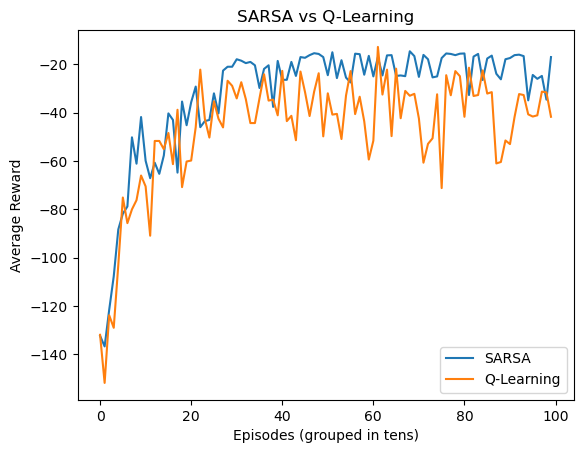

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class CliffWalkingEnv:
    def __init__(self):
        self.width = 12
        self.height = 4
        self.start = (3, 0)
        self.goal = (3, 11)
        self.cliff = [(3, i) for i in range(1, 11)]

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, state, action):
        moves = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}  # Up, Down, Left, Right
        next_state = (state[0] + moves[action][0], state[1] + moves[action][1])
        if next_state in self.cliff:
            return self.start, -100, True
        if next_state == self.goal:
            return next_state, 0, True
        if 0 <= next_state[0] < self.height and 0 <= next_state[1] < self.width:
            return next_state, -1, False
        return state, -1, False

def epsilon_greedy_policy(Q, state, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(4)
    else:
        max_value = np.max(Q[state])
        best_actions = np.flatnonzero(Q[state] == max_value)
        return np.random.choice(best_actions)

def train(env, episodes, eta, gamma, epsilon, method):
    Q = np.zeros((env.height, env.width, 4))
    episode_rewards = []

    for _ in range(episodes):
        total_reward = 0
        state = env.reset()
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done = env.step(state, action)
            if method == 'sarsa':
                next_action = epsilon_greedy_policy(Q, next_state, epsilon)
                target = Q[next_state][next_action]
            elif method == 'q_learning':
                target = np.max(Q[next_state])
            Q[state][action] += eta * (reward + gamma * target - Q[state][action])
            state = next_state
            total_reward += reward

        episode_rewards.append(total_reward)

    return episode_rewards

env = CliffWalkingEnv()
episodes = 1000
eta = 0.1
gamma = 0.999
epsilon = 0.1

sarsa_rewards = train(env, episodes, eta, gamma, epsilon, 'sarsa')
q_learning_rewards = train(env, episodes, eta, gamma, epsilon, 'q_learning')

# Plotting
plt.plot(np.mean(np.array(sarsa_rewards).reshape(-1, 10), axis=1), label='SARSA')
plt.plot(np.mean(np.array(q_learning_rewards).reshape(-1, 10), axis=1), label='Q-Learning')
plt.xlabel('Episodes (grouped in tens)')
plt.ylabel('Average Reward')
plt.legend()
plt.title('SARSA vs Q-Learning')
plt.show()
